# Regressão Linear Múltipla

## Carregando o Dataset Boston Houses

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-residential acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. TARGET: Median value of owner-occupied homes in $1000's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [2]:
# Gerando o dataset
boston = load_boston() 
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [3]:
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [4]:
len(dataset)

506

## Análise Descritiva

In [5]:
dataset.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
target   506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
target    25.000000   50.0000

In [6]:
dataset.describe()['target'] # variável preditora ou Classe ou Label

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


## Gerando número de observações 

In [8]:
observations = len(dataset)
observations

506

In [9]:
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

## Coletando x e y

In [10]:
dataset.iloc[:,:-1][:3]

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03

In [11]:
X = dataset.iloc[:,:-1]
y = dataset['target'].values

In [12]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [13]:
len(X.columns)

13

In [ ]:
y[:5]

### Matriz de Correlação

In [14]:
# Gerando a matriz
X = dataset.iloc[:,:-1]
matriz_corr = X.corr()
print (matriz_corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

## Visualizando a matriz de correlação (somente os atributos)

In [15]:
# Criando um Correlation Plot
def visualize_correlation_matrix(data, hurdle = 0.0):
    fig = plt.figure(figsize=(12,9))
    ax = fig.add_subplot(111)
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(dataset.columns[:-1], minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(dataset.columns[:-1], minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off')   
    plt.colorbar()
    plt.show()

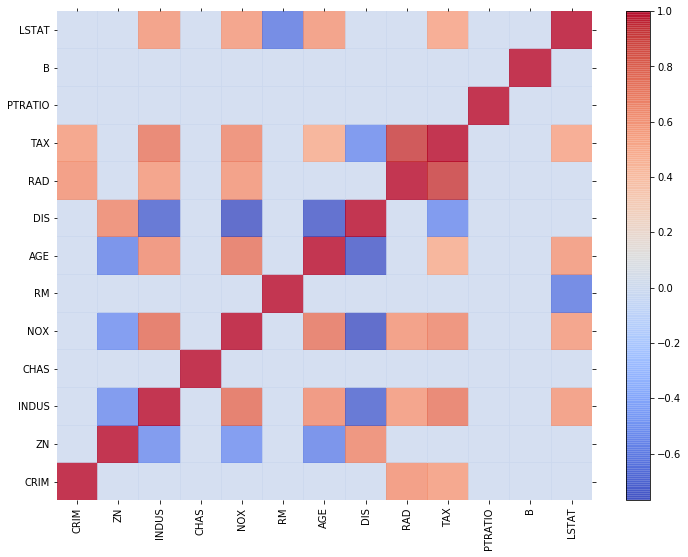

In [16]:
# Visualizando o Plot
visualize_correlation_matrix(X, hurdle = 0.5)

In [17]:
# matriz de Correlação com a variável preditora
mt = pd.DataFrame(dataset.values, columns=dataset.columns)
mt_corr = mt.corr()
print (abs(mt_corr['target']).sort_values(ascending=False))

target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: target, dtype: float64


# Criar o modelo

In [36]:
X = dataset.copy()
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target     y_prev      Erro  
0     15.3  396.90   4.98    24.0  30.003843  6.003843  
1     17.8  396.90   9.14    21.6  25.025562  3.425562  
2     17.8  392.83   4.03    34.7  30.567597  4.132403  
3     18.7  394.63   2.94    33.4  28.607036  4.792964  
4     18.7  396.90   5.33    36.2  27.943524  8.256476

In [37]:
'''
target     1.000000

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
'''

atributos = [ 
'LSTAT',     
'RM',      
'PTRATIO',   
'INDUS',     
'TAX',       
'NOX',        
'CRIM',     
'RAD',      
'AGE',        
'ZN', 'B', 'DIS', 'CHAS']

X = dataset.copy()
X = X[ atributos]
X.head()

LSTAT     RM  PTRATIO  INDUS    TAX    NOX     CRIM  RAD   AGE    ZN  \
0   4.98  6.575     15.3   2.31  296.0  0.538  0.00632  1.0  65.2  18.0   
1   9.14  6.421     17.8   7.07  242.0  0.469  0.02731  2.0  78.9   0.0   
2   4.03  7.185     17.8   7.07  242.0  0.469  0.02729  2.0  61.1   0.0   
3   2.94  6.998     18.7   2.18  222.0  0.458  0.03237  3.0  45.8   0.0   
4   5.33  7.147     18.7   2.18  222.0  0.458  0.06905  3.0  54.2   0.0   

        B     DIS  
0  396.90  4.0900  
1  396.90  4.9671  
2  392.83  4.9671  
3  394.63  6.0622  
4  396.90  6.0622

In [38]:
X = X.values
X[:3]

array([[4.9800e+00, 6.5750e+00, 1.5300e+01, 2.3100e+00, 2.9600e+02,
        5.3800e-01, 6.3200e-03, 1.0000e+00, 6.5200e+01, 1.8000e+01,
        3.9690e+02, 4.0900e+00],
       [9.1400e+00, 6.4210e+00, 1.7800e+01, 7.0700e+00, 2.4200e+02,
        4.6900e-01, 2.7310e-02, 2.0000e+00, 7.8900e+01, 0.0000e+00,
        3.9690e+02, 4.9671e+00],
       [4.0300e+00, 7.1850e+00, 1.7800e+01, 7.0700e+00, 2.4200e+02,
        4.6900e-01, 2.7290e-02, 2.0000e+00, 6.1100e+01, 0.0000e+00,
        3.9283e+02, 4.9671e+00]])

In [41]:
# Criando um modelo
modelo = linear_model.LinearRegression()
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Mostrar os pesos dos Atributos ( yprev = w1X1 + w2X2 + ... + wnXn )

In [42]:
for coef, var in sorted(zip(modelo.coef_, dataset.columns[:-1]), reverse = True):
    print ("%6.3f %s" % (coef,var))

 3.850 ZN
 0.328 DIS
 0.047 TAX
 0.040 CHAS
 0.010 PTRATIO
 0.003 RAD
-0.014 NOX
-0.113 AGE
-0.534 CRIM
-0.991 INDUS
-1.485 B
-17.367 RM


### Avaliando o modelo com o R Squared (R²) 

In [43]:
def r2_est(X,y):
    modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)
    return r2_score(y, modelo.fit(X,y).predict(X))

In [44]:
print ('R2: %0.3f' %  r2_est(X,y))

R2: 0.736


# Métricas para Algoritmos de Regressão

### Gerando o dataset

In [45]:
dataset['y_prev'] = modelo.predict(X)
#dataset['Erro'] = dataset['y_prev'] - dataset['target'] 
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target     y_prev      Erro  
0     15.3  396.90   4.98    24.0  30.212372  6.003843  
1     17.8  396.90   9.14    21.6  25.267234  3.425562  
2     17.8  392.83   4.03    34.7  30.849359  4.132403  
3     18.7  394.63   2.94    33.4  28.764763  4.792964  
4     18.7  396.90   5.33    36.2  28.103196  8.256476

In [47]:
dataset['Erro'] = abs (dataset['y_prev'] - dataset['target'] )
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target     y_prev      Erro  
0     15.3  396.90   4.98    24.0  30.212372  6.212372  
1     17.8  396.90   9.14    21.6  25.267234  3.667234  
2     17.8  392.83   4.03    34.7  30.849359  3.850641  
3     18.7  394.63   2.94    33.4  28.764763  4.635237  
4     18.7  396.90   5.33    36.2  28.103196  8.096804

In [48]:
dataset.Erro.sum()

1665.5287712757047

## MAE - Mean Absolute Error
É a soma da diferença absoluta entre previsões e valores reais.<br />
Fornece uma ideia de quão erradas estão nossas previsões.<br />
Valor igual a 0 indica que não há erro, sendo a previsão perfeita <br />
(a exemplo do Logloss, a função cross_val_score inverte o valor) 

In [49]:
from sklearn import model_selection
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, 
                                            scoring = 'neg_mean_absolute_error')

# Print do resultado
print("MAE: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

MAE: -3.412 (0.643)


In [ ]:
MAE: -3.387 (0.667)
    
MAE: -3.412 (0.643) - 1 atributo a menos 'CHAS'

## MSE - Mean Squared Error
Similar ao MAE, fornece a magnitude do erro do modelo.<br />
Ao extrairmos a raiz quadrada do MSE convertemos as unidades de volta ao original, 
o que pode ser útil para descrição e apresentação.<br />
Isso é chamado RMSE (Root Mean Squared Error)

In [50]:
# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'neg_mean_squared_error')

# Print do resultado
print("MSE: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

MSE: -24.180 (11.280)


In [ ]:
MSE: -23.747 (11.143)
    
MSE: -24.180 (11.280) - 1 Atributo a menos 'CHAS'

# RMSE (Root Mean Squared Error)

Similar ao MAE, fornece a magnitude do erro do modelo.<br>
Ao extrairmos a raiz quadrada do MSE convertemos as unidades de volta ao original, o que pode ser útil para descrição e apresentação.

In [52]:
from math import sqrt
print("RMSE: %.3f " % (sqrt(abs(resultado.mean()))))

RMSE: 4.917 


In [ ]:
RMSE: 4.873 
    
RMSE: 4.917 - 1 Atributo a menos 'CHAS' 

## R2  
Essa métrica fornece uma indicação do nível de precisão das previsões em relação aos valores observados.<br />
Também chamado de coeficiente de determinação.<br />
Valores entre 0 e 1, sendo 1 o valor ideal.

In [53]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'r2')

# Print do resultado
print("R^2: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

R^2: 0.712 (0.102)


In [ ]:
R^2: 0.718 (0.099)
    
R^2: 0.712 (0.102) - 1 Atributo a menos 'CHAS' 